In [256]:
# %%script echo skipping # 3b
import numpy as np
from scipy.stats import cauchy


def g(x):
    if np.isscalar(x):
        return 1/(1+x**2)
    
    return 1/(1 + np.einsum('i,i->i', x, x))

def density_standard_normal(x):
    if np.isscalar(x):
        return np.exp( -(x**2)/2 )
    
    return np.exp( -np.einsum('i,i->i', x, x) / 2 )

def threshold_X(x, M: np.float64):
    if np.isscalar(x):
        return density_standard_normal(x) / (M*g(x))
    
    return np.einsum('i,i->i', density_standard_normal(x), 1/(M*g(x)))

def indicator_X(x):
    return np.where(x <= 0, 1, 0)

rng = np.random.default_rng()

N_observations = 1_000_0
M = 2*np.sqrt(np.e)
M

np.float64(3.2974425414002564)

In [257]:
X_init = cauchy.rvs(size=N_observations)
U_init = rng.uniform(0, 1, N_observations)

Y: np.ndarray = np.einsum('i,i->i', indicator_X(U_init - threshold_X(X_init, M)), X_init)
Y_list: list = Y[Y != 0].tolist()

In [258]:
# %%script echo skipping # 3b
from tqdm.notebook import tqdm

with tqdm(total=N_observations, initial=len(Y_list)) as progress_bar:
    while True:
        if len(Y_list) == N_observations:
            break

        X: np.ndarray = cauchy.rvs()
        U = rng.uniform(0, 1)

        if U <= threshold_X(X, M):
            progress_bar.update()
            Y_list.append(X.item())

 24%|##4       | 2433/10000 [00:00<?, ?it/s]

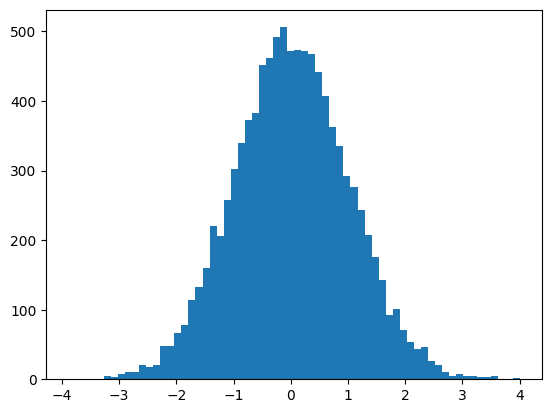

In [259]:
import matplotlib.pyplot as plt

plt.hist(Y_list, bins='auto')
plt.show()

In [260]:
%reset -f